In [2]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
erk.bond_price(5, 100, .05, 12, .03)

0    109.275393
dtype: float64

In [4]:
rates, zc_prices = erk.cir(10, 500, b = 0.03, r_0 = 0.03)

In [5]:
rates

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000
1,0.030009,0.027432,0.023226,0.027411,0.029849,0.029723,0.026071,0.034756,0.029927,0.034298,...,0.025610,0.026438,0.029546,0.027908,0.029114,0.028527,0.027365,0.028618,0.029869,0.028444
2,0.028499,0.029771,0.024681,0.029362,0.026997,0.030492,0.026260,0.037827,0.029511,0.033589,...,0.022869,0.027668,0.026387,0.029713,0.027804,0.025270,0.024331,0.033162,0.030936,0.025020
3,0.027851,0.033198,0.022219,0.026130,0.028379,0.027344,0.025636,0.043812,0.030905,0.035729,...,0.019187,0.027060,0.027294,0.029688,0.027731,0.027042,0.023953,0.032136,0.030312,0.026629
4,0.025800,0.032711,0.025364,0.022850,0.024887,0.030127,0.025786,0.044521,0.031718,0.036954,...,0.017873,0.020655,0.031584,0.026069,0.027744,0.028307,0.025834,0.035349,0.025750,0.029760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.028468,0.010108,0.000213,0.030109,0.025246,0.006870,0.027435,0.058952,0.036098,0.085341,...,0.001594,0.004794,0.008850,0.066791,0.017027,0.013992,0.015826,0.049260,0.020621,0.015882
117,0.032289,0.009474,0.000364,0.027421,0.022456,0.007827,0.027738,0.059430,0.039790,0.083269,...,0.000749,0.006096,0.009083,0.064946,0.018749,0.013398,0.016327,0.058234,0.019341,0.016420
118,0.034624,0.010079,0.000304,0.023710,0.020928,0.008061,0.029733,0.064363,0.044177,0.071523,...,0.000770,0.005074,0.008935,0.069809,0.020358,0.009376,0.015755,0.057544,0.018340,0.015510
119,0.033550,0.010324,0.000719,0.021972,0.020441,0.006474,0.028068,0.062465,0.044536,0.079223,...,0.001121,0.006459,0.009189,0.068734,0.018491,0.009091,0.013199,0.057883,0.017964,0.014301


In [6]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [7]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    110.533170
2    112.627513
3    110.543325
dtype: float64

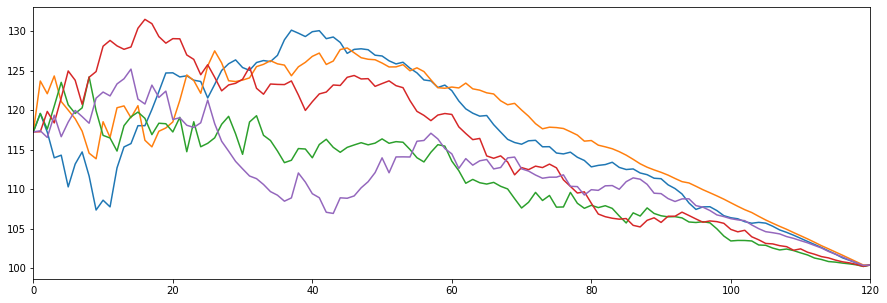

In [8]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend = False, figsize = (15,5))

In [9]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

,1,2,3,4,5
0,117.26,117.26,117.26,117.26,117.26
1,119.575,123.695,119.595,117.278,117.397
2,117.227,122.086,117.608,119.847,116.556
3,113.978,124.333,120.526,118.397,119.371
4,114.311,121.1,123.528,121.557,116.648
...,...,...,...,...,...
116,101.327,101.659,100.659,100.821,101.436
117,101.012,101.241,100.562,100.686,101.053
118,100.665,100.828,100.437,100.483,100.698
119,100.33,100.411,100.233,100.246,100.363


In [10]:
br = prices.pct_change().dropna()
erk.annualize_rets(br, 12)
# this is the price return, not the total return of the bond (did not add the coupon)

1   -0.015387
2   -0.015387
3   -0.015387
4   -0.015387
5   -0.015387
dtype: float64

In [11]:
p = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, 0.05, 12)
erk.annualize_rets(btr, 12)
# affected by interests because intermediate coupons are reinvested

1    0.028013
2    0.027546
3    0.029891
4    0.028385
dtype: float64

In [12]:
price_10 = erk.bond_price(10,100, 0.05, 12, rates)
price_10[[1,2,3]].tail()

,1,2,3
116,101.327,101.659,100.659
117,101.012,101.241,100.562
118,100.665,100.828,100.437
119,100.33,100.411,100.233
120,100.417,100.417,100.417


In [13]:
price_30 = erk.bond_price(30,100, 0.05, 12, rates)
price_30[[1,2,3]].tail()
# do not converge because we have 20 more years to go

,1,2,3
116,173.293,201.013,130.22
117,174.647,200.14,135.054
118,172.824,199.911,142.11
119,171.936,198.259,145.478
120,178.439,198.404,145.142


In [14]:
rets_30 = erk.bond_total_return(price_30, 100, 0.05, 12)
rets_10 = erk.bond_total_return(price_10, 100, 0.05, 12)
rets_bonds = .6 * rets_10 + .4 * rets_30

In [15]:
mean_rets_bonds = rets_bonds.mean(axis = 'columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.03636,0.00397,0.227589,2.866595,-0.001176,-0.000784,1.559053,0.0


In [16]:
price_eq = erk.gbm(n_years = 10, n_scenarios = 500, mu = 0.07, sigma = 0.15)
price_eq.shape

(121, 500)

In [17]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [18]:
rets_bonds.shape

(120, 500)

In [19]:
rets = .7 * rets_eq + .3 * rets_bonds
rets_mean = rets.mean(axis = "columns")
erk.summary_stats(pd.DataFrame(rets_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059942,0.004847,-0.107088,2.672101,-0.002521,-0.002067,6.013086,0.0


In [20]:
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator = erk.fixedmix_allocator, w1 = 0.6)
mean_rets_bonds = rets_bonds.mean(axis = 'columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.03636,0.00397,0.227589,2.866595,-0.001176,-0.000784,1.559053,0.0


In [21]:
price_eq = erk.gbm(n_years = 10, n_scenarios = 500, mu = 0.07, sigma = 0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()

In [22]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator = erk.fixedmix_allocator, w1 = 0.7)
rets_7030b_mean = rets_7030b.mean(axis = 1)
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,0.059103,0.00481,0.069974,2.419971,-0.002535,-0.002148,5.88944,0.0


In [23]:
summaries  = erk.summary_stats(rets_7030b)

In [24]:
summaries.head()

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,-0.045058,0.101448,0.297674,2.685403,0.049048,0.055091,-0.720138,-0.483877
1,0.027129,0.096625,-0.084867,3.260253,0.043590,0.057558,-0.029035,-0.161442
2,0.137636,0.126162,0.273267,2.772179,0.045503,0.055625,0.830278,-0.084367
3,0.112769,0.104830,-0.133695,2.437374,0.041650,0.049769,0.768379,-0.109815
4,0.038774,0.105173,0.180710,2.415000,0.044887,0.051669,0.081066,-0.263743


In [25]:
summaries.mean()

Annualized Return          0.053648
Annualized Vol             0.107507
Skewness                  -0.005982
Kurtosis                   2.952053
Cornish-Fisher VaR (5%)    0.046083
Historic CVaR (5%)         0.058357
Sharpe Ratio               0.216120
Max Drawdown              -0.210128
dtype: float64

In [30]:
pd.concat([erk.terminal_stats(rets_bonds, name = "FI"),
    erk.terminal_stats(rets_eq, name = "Eq"),
     erk.terminal_stats(rets_7030b, name = "70/30")], axis = 1)

,FI,Eq,70/30
mean,1.389672,1.965170,1.778458
std,0.102906,1.042053,0.639200
p_breach,NaN,0.050000,0.020000
e_short,NaN,0.158870,0.063930
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


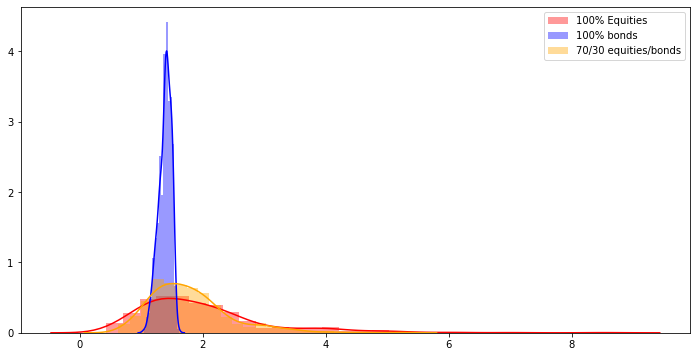

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
sns.distplot(erk.terminal_values(rets_eq), color = "red", label = "100% Equities")
sns.distplot(erk.terminal_values(rets_bonds), color = "blue", label = "100% bonds")
sns.distplot(erk.terminal_values(rets_7030b), color = "orange", label = "70/30 equities/bonds")
plt.legend();


In [36]:
rets_g8020 = erk.bt_mix (rets_eq, rets_bonds, allocator = erk.glidepath_allocator, start_glide = .80, end_glide = .20)
pd.concat([erk.terminal_stats(rets_bonds, name = "FI"),
    erk.terminal_stats(rets_eq, name = "Eq"),
     erk.terminal_stats(rets_7030b, name = "70/30"),
          erk.terminal_stats(rets_g8020, name = "Glide 80 to 20")], axis = 1)


,FI,Eq,70/30,Glide 80 to 20
mean,1.389672,1.965170,1.778458,1.651831
std,0.102906,1.042053,0.639200,0.446904
p_breach,NaN,0.050000,0.020000,0.004000
e_short,NaN,0.158870,0.063930,0.012980
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [39]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios = n_scenarios, b = 0.03, r_0 = 0.03, sigma = 0.02)
price_eq = erk.gbm(n_years = 10, n_scenarios = n_scenarios, mu = 0.07, sigma= 0.15)

In [42]:
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator = erk.fixedmix_allocator, w1 = 0.7)
pd.concat([erk.terminal_stats(rets_bonds, name = "ZC", floor = 0.75),
    erk.terminal_stats(rets_eq, name = "Eq", floor = 0.75),
     erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75)], axis = 1).round(2)


,ZC,Eq,70/30
mean,1.39,1.96,1.75
std,0.10,0.96,0.59
p_breach,NaN,0.04,0.01
e_short,NaN,0.11,0.07
p_reach,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN


In [43]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor=.75, zc_prices = zc_prices[1:])
pd.concat([erk.terminal_stats(rets_bonds, name = "ZC", floor = 0.75),
    erk.terminal_stats(rets_eq, name = "Eq", floor = 0.75),
     erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
           erk.terminal_stats(rets_floor75, name = "floor75", floor = 0.75)], axis = 1).round(2)


,ZC,Eq,70/30,floor75
mean,1.39,1.96,1.75,1.94
std,0.10,0.96,0.59,0.97
p_breach,NaN,0.04,0.01,NaN
e_short,NaN,0.11,0.07,NaN
p_reach,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN


In [45]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor=.75, zc_prices = zc_prices[1:], m =1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator = erk.floor_allocator, floor=.75, zc_prices = zc_prices[1:], m = 5)
pd.concat([erk.terminal_stats(rets_bonds, name = "ZC", floor = 0.75),
    erk.terminal_stats(rets_eq, name = "Eq", floor = 0.75),
     erk.terminal_stats(rets_7030b, name = "70/30", floor = 0.75),
           erk.terminal_stats(rets_floor75, name = "floor75", floor = 0.75),
          erk.terminal_stats(rets_floor75m1, name = "floor75m1", floor = 0.75),
          erk.terminal_stats(rets_floor75m5, name = "floor75m5", floor = 0.75)], axis = 1).round(4)


,ZC,Eq,70/30,floor75,floor75m1,floor75m5
mean,1.3897,1.9641,1.7542,1.9394,1.6194,1.9494
std,0.1029,0.9604,0.5882,0.9658,0.4238,0.9693
p_breach,NaN,0.0372,0.0066,NaN,NaN,0.0002
e_short,NaN,0.1135,0.0725,NaN,NaN,0.0003
p_reach,NaN,NaN,NaN,NaN,NaN,NaN
e_surplus,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
cash_rate = 0.02
monthly_cashreturn = (1+cash_rate) ** (1/12) -1
rets_cash = pd.DataFrame(data = monthly_cashreturn, index = rets_eq.index, columns = rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator =erk.drawdown_allocator, maxdd=.25)

In [51]:
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

In [52]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.124227
1   -0.204202
2   -0.182680
3   -0.110343
4   -0.191539
Name: Max Drawdown, dtype: float64

In [53]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23634598849184046